# Lab 02: Exploring 50 Reuter Authors 

Erik Gabrielsen, Danh Nguyen 

## Business Understanding

In this lab we are exploring the [Reuters 50 50](https://archive.ics.uci.edu/ml/datasets/Reuter_50_50) Dataset from the UCI Repository. The dataset includes a training set and a test set, each containing 50 works of 50 different authors, for a total of 2500 articles. This dataset allows us to explore the field of authorship identification, and seeing how different authors write. The articles chosen are under the "corporate/industrial" subtopic to reduce the ability to distinguish through topics. Authors may be identifiable through certain types of words and expressions common throughout their work but not in others' works. We will only be visualizing the training set (C50training) in this lab, but the dataset will save us steps in building classification models and testing them later on. Furthermore, we may use this data to predict biases or sentiments in different authors and compare them.

In [32]:
import pandas as pd
import numpy as np
import os
from scipy.misc import imread
import matplotlib.pyplot as plt
import random
import warnings
import seaborn as sns


directory = os.path.expanduser('~/Downloads/C50/C50train/')
articles = []
authors = []

# loop over directories: 
for author in os.listdir(directory):
    folder = os.path.join(directory, author)
    
    # loop over files in folder
    for filename in os.listdir(folder):
        with open(os.path.join(folder, filename)) as f:
            articles.append(f.read()) # append to array
            authors.append(author)

## Data Encoding

In [33]:
import re
from nltk.corpus import stopwords
cachedStopWords = stopwords.words('english')

cleaned_articles = []
for item in articles:
    letters = re.sub("[^a-zA-Z]", " ", item)
    lower_case = letters.lower()
    text = ' '.join([word for word in lower_case.split() if word not in cachedStopWords])
    cleaned_articles.append(text)

### Bag of Words

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer() # an object capable of counting words in a document!

bag_words = count_vect.fit_transform(cleaned_articles)

In [134]:
print(bag_words.shape) # this is a sparse matrix
print('=========')
# print(bag_words[0])

(50, 3241)


In [135]:
pd.options.display.max_columns = 999
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())

df_frequency.head()

,ab,abandon,abandoning,abhishek,ability,abishek,able,absorbed,acccess,accelerate,accelerated,accept,acceptance,accepted,access,acclerate,accompanied,according,account,accounted,accounting,accounts,acknowledging,acquire,acquired,acquisition,acquisitions,acquistion,acqusisitions,acqusition,acrobat,across,acted,actions,active,actively,actives,activex,activity,actual,actually,adaptec,adapter,add,added,adding,addition,additional,address,addressing,administrators,adobe,adopt,adopted,adoption,ads,advanced,advancers,advantage,adversaries,advertising,advised,affecting,afternon,afternoon,age,aggressive,aggressively,agnich,ago,agreed,agreement,agreements,ahead,ailing,aim,aimed,air,aircraft,airtouch,albany,albeit,alex,allayed,alleged,alleging,allen,alliance,allow,allowed,allowing,allows,almost,alone,along,alongside,already,also,altera,alternative,alternatives,although,alto,always,ambitious,amd,amelio,america,american,amid,among,amortization,amount,amounted,amounting,amounts,amp,ana,analyst,analysts,ancillary,andrew,angeles,angered,annouce,announce,announced,announcement,announcements,annual,another,anti,anticipated,anticipating,anticipation,anyone,anysoft,anything,anytime,anywhere,aol,aolnet,apparent,appear,appeared,appears,applauded,apple,application,applications,applied,apply,appreciated,appropriate,approval,approved,approximately,april,architects,area,areas,arena,argue,argued,argues,argument,ariz,arlen,arm,around,arrangement,array,arrived,arthur,article,ascend,ask,asked,asking,asserted,assessment,asset,assets,assistants,assocates,associated,associates,assocites,assume,asynchronous,atlanta,atlantic,atm,attack,attempt,attempts,attended,attending,attract,attractive,attributed,auchard,auctions,audacious,audiences,august,author,authorisation,authorise,auto,automated,automation,available,avalanche,average,away,awe,ayvazian,back,backbone,backed,backers,backing,backoffice,bad,badly,bajarin,bake,balance,balances,ballot,baltimore,band,bane,bank,banking,banner,bargain,bargains,barjarin,barksdale,barney,barriers,barry,barzowskas,base,based,basement,bases,basic,basically,basics,basis,battle,battling,bay,beach,bear,beat,beaten,beating,became,become,becomes,becoming,bedford,beef,began,begin,beginning,begins,begun,behind,belief,believe,believed,believes,bell,bellwether,bellwethers,beneficiaries,benefit,benefited,benificiary,berge,bernard,besides,best,bet,bethesda,better,betting,beyond,bid,bidder,bidding,big,biggest,bill,billerica,billion,billions,bit,blachno,blackout,blamed,bleier,blew,block,blow,blue,blueprint,bluestein,board,boards,boca,boils,bolster,bolstering,bolts,bomb,book,bookings,boom,boost,boosted,boosting,border,boston,bottom,bound,bounded,boxes,boys,brain,brand,brands,break,breakthrough,breed,brief,briefed,briefing,briefings,bring,bringing,brings,british,broad,broadcast,broadcasting,broadening,broader,brokerage,brokerages,brokers,brothers,brown,browse,browser,brutal,bt,build,builds,built,bulk,bulletin,bullish,bumped,bundling,buoy,bureau,burned,burns,burton,business,businesses,bust,buy,buyback,buybacks,buyers,buying,byron,ca,cable,cabletron,cabling,calculations,calendar,calender,calif,california,call,called,callers,calling,calls,cambridge,came,camera,cameramakers,cameras,camp,campaign,canada,cancellations,candidates,candy,cannot,capabalities,capable,capacity,capital,capitalization,capturing,card,cardinal,cards,careful,carpet,carrier,carriers,carry,carved,casade,cascade,case,cash,casualty,catalog,catalyst,catch,category,cause,caused,causing,caution,cautioned,cautious,cede,celluar,cellular,center,central,centre,cents,ceo,cereal,certain,certainly,chain,chairman,challenge,challenged,challenges,chance,chances,change,changed,changes,changing,channel,chapter,charge,charged,charges,charles,chart,charter,charts,chemical,chet,cheyenne,chief,chip,chipmakers,chipped,chips,chipset,choice,chris,chuck,circuit,cirrus,cisco,cited,cities,citing,city,claimed,clara,clark,class,classified,clear,clearly,clicking,client,...,south,soxx,space,sparked,speak,special,s

In [8]:
print(len(count_vect.vocabulary_))

29137


In [93]:
count_vect.inverse_transform(bag_words[0])

[array(['internet', 'may', 'overflowing', 'new', 'technology', 'crime',
        'cyberspace', 'still', 'old', 'fashioned', 'variety', 'national',
        'consumers', 'league', 'said', 'wednesday', 'popular', 'scam',
        'pyramid', 'scheme', 'early', 'investors', 'bogus', 'fund', 'paid',
        'deposits', 'later', 'non', 'profit', 'consumer', 'advocacy',
        'group', 'tracks', 'web', 'scams', 'site', 'set', 'world', 'wide',
        'february', 'called', 'fraud', 'watch', 'http', 'www', 'org',
        'collects', 'reports', 'directly', 'widely', 'praised', 'law',
        'enforcement', 'agencies', 'suspect', 'critical', 'information',
        'jodie', 'bernstein', 'director', 'federal', 'trade', 'commission',
        'bureau', 'protection', 'major', 'help', 'ftc', 'identifying',
        'particular', 'infancy', 'example', 'used', 'shut', 'run',
        'fortuna', 'alliance', 'taken', 'million', 'promising', 'could',
        'earn', 'month', 'initial', 'deposit', 'instead', 'ke

### TFIDF

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()

tfidf_mat = tfidf_vect.fit_transform(cleaned_articles) 

In [78]:
# convert to pandas to get better idea about the data
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
df.head()

,aa,aaa,aah,aaron,aart,ab,aba,abadoning,abandon,abandoned,abandoning,abated,abating,abb,abbey,abbott,abbreviated,abc,abdelkader,abdicating,abdidjan,abducted,abduction,abductions,abdulaziz,abdureschit,abel,abelardo,abercrombie,aberdeen,abettors,abf,abhishek,abhor,abhorred,abhorrence,abhors,abi,abide,abides,abiding,abidjan,abile,abilities,ability,abishek,abject,ablait,ablaze,able,abn,abnomals,abnormal,abnormally,abnormals,abnornals,abnornmal,aboard,abode,abolish,abolished,abolishing,abolition,abominable,aboput,aboriginal,abormal,aborted,abortive,abound,abounded,abounds,abraham,abril,abroad,abrupt,abruptly,abseil,absence,absent,absolute,absolutely,absorb,absorbable,absorbed,absorbing,absorbs,abstain,abstained,abstruse,absurd,abu,abundance,abundant,abundantly,abuse,abused,abuses,abusing,abuts,abuzz,abysmal,ac,acacia,academia,academic,academics,academy,acapulco,acc,accc,acccess,accelerate,accelerated,accelerates,accelerating,acceleration,accelerator,accelerators,accellerator,accent,accents,accentuated,accept,acceptability,acceptable,acceptance,acceptances,accepted,accepting,acceptors,accepts,accesion,access,accessed,accessible,accessing,accession,accessories,accident,accidental,accidents,acclaimed,acclerate,accolades,accolate,accommodate,accommodating,accommodation,accomodate,accomodating,accomodation,accompanied,accompany,accompanying,accompli,accomplices,accomplish,accomplished,accomplishing,accomplishments,accontancy,accord,accordance,accorded,according,accordingly,accords,account,accountability,accountable,accountancy,accountant,accountants,accounted,accounting,accountings,accounts,accreditation,accredited,accretive,accross,accrue,accruing,accumlated,accumulate,accumulated,accuracy,accurate,accurately,accusation,accusations,accuse,accused,accuses,accusing,accustomed,ace,acer,aces,acess,aches,achievable,achieve,achieved,achievement,achievements,achieving,achilles,achinsk,achinsky,acid,acidity,acids,acitivity,acknowledge,acknowledged,acknowledgement,acknowledges,acknowledging,acknowledgment,acknowleged,acmi,acount,acounts,acoustic,acpc,acquainted,acquire,acquired,acquirer,acquirers,acquiring,acquiror,acquirors,acquisition,acquisitions,acquisitive,acquistion,acquittal,acquitted,acqusiiton,acqusisitions,acqusition,acqusitions,acre,acres,acrimonious,acrobat,acronym,across,acrylic,acrylonitrile,acs,act,acted,acting,action,actionnaires,actions,activate,activated,active,actively,actives,activex,activision,activism,activist,activists,activites,activities,activity,acton,actor,actors,actress,acts,actual,actualise,actually,actuaries,actuary,actuators,acute,acutely,ad,adacte,adam,adamant,adamantly,adams,adande,adapt,adaptable,adaptations,adaptec,adapted,adapter,adapters,adapting,adaption,adb,add,addded,added,addicted,addiction,addictive,addicts,adding,addition,additional,additionally,additions,additive,additives,address,addressed,addresses,addressing,adds,adef,adelaide,adelman,adept,adequacy,adequate,adequately,adhere,adhered,adherents,adhesive,adhesives,adiake,adidas,adjacent,adjoining,adjoins,adjourn,adjourned,adjourning,adjournment,adjust,adjustable,adjusted,adjusting,adjustment,adjustments,adm,administartion,administer,administered,administers,administration,administrations,administrative,administratively,administrator,administrators,adminstration,adminstrative,admiral,admire,admired,admirer,admission,admissions,admit,admits,admittance,admitted,admittedly,admitting,adobe,adolescent,adolf,adolph,adome,adopt,adopted,adopting,adoption,adopts,adorded,adorned,adr,adressing,adrian,adriano,adrift,adroh,adrs,ads,adss,adt,adulation,adulatory,adult,adults,advance,advanced,advancers,advances,advancing,advantage,advantageous,advantages,advent,adventure,adventurers,adventurous,adversaries,adverse,adversely,adverstising,advert,advertise,advertised,advertisement,advertisements,advertiser,advertisers,advertises,advertising,adverts,advice,advise,advised,adviser,advisers,advises,advising,advisor,advisors,advisory,advocacy,advocate,advocated,advocates,adv

In [77]:
import pandas as pd

warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 
plt.style.use('ggplot')

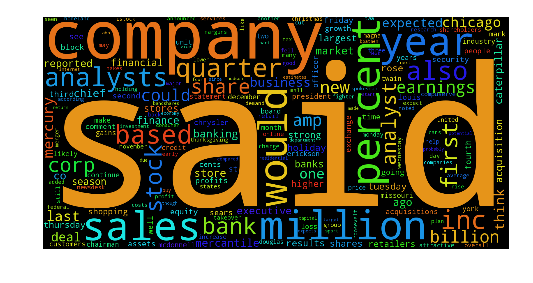

In [117]:
# Creating word cloud Frequency
from wordcloud import WordCloud, STOPWORDS
freq = df_frequency.sum().sort_values()[-2000:].to_dict()

tuples = tuple([tuple(x) for x in freq.items()])

wordcloud = WordCloud(width=1600, height=800).generate_from_frequencies(tuples)
plt.imshow(wordcloud)
plt.axis("off")
plt.figure( figsize=(10,20) )
plt.show()

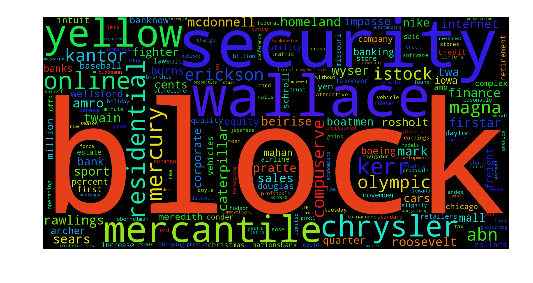

In [118]:
# Creating word cloud TF IDF
most_rel = df.max().sort_values()[-2000:].to_dict()
tuples_tfidf = tuple([tuple(x) for x in most_rel.items()])

wordcloud = WordCloud(width=1600, height=800).generate_from_frequencies(tuples_tfidf)
plt.imshow(wordcloud)
plt.axis("off")
plt.figure( figsize=(10,20) )
plt.show()

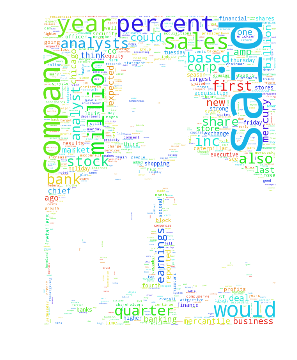

In [121]:
from PIL import Image
import numpy as np

from wordcloud import WordCloud, STOPWORDS

script_dir = os.path.dirname(os.path.expanduser("~/ML/MachingLearning/Lab02/"))
# patternizeimg
alice_mask = np.array(Image.open(os.path.join(script_dir, 'patternizeimg.png')))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords)
# generate word cloud
wc.generate(text).generate_from_frequencies(tuples)

# show
plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.show()

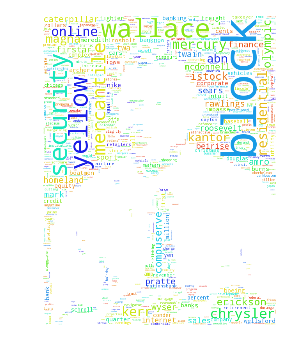

In [120]:
# generate word cloud
wc.generate(text).generate_from_frequencies(tuples_tfidf)

# show
plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.show()

In [40]:
df_frequency.sum().sort_values()[-10:]

billion     3058
china       3154
market      3336
new         3547
company     3778
million     4877
would       5202
percent     5296
year        5386
said       19856
dtype: int64

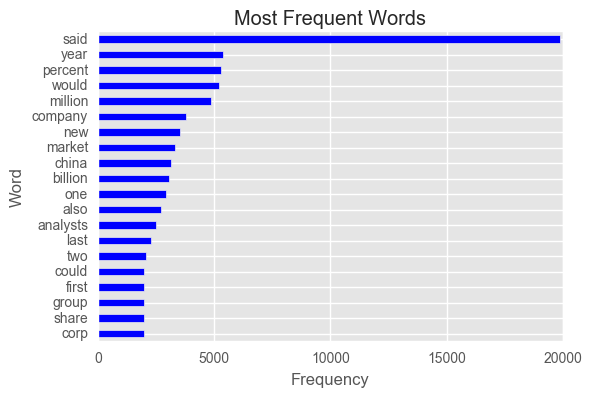

In [75]:
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="Blue")
plt.xlabel("Frequency")
plt.ylabel("Word")

In [81]:
most_rel = df.max().sort_values()[-20:]
most_rel

rogers        0.758104
prodigy       0.760541
cez           0.760783
macromedia    0.760991
greycoat      0.762087
valeo         0.763790
aol           0.770237
atm           0.772200
steel         0.773742
revco         0.774348
shiva         0.776267
conseco       0.777747
kemp          0.784070
rice          0.788661
daiwa         0.790479
sainsbury     0.799519
ashland       0.799767
potash        0.810866
cbc           0.812043
intuit        0.867471
dtype: float64

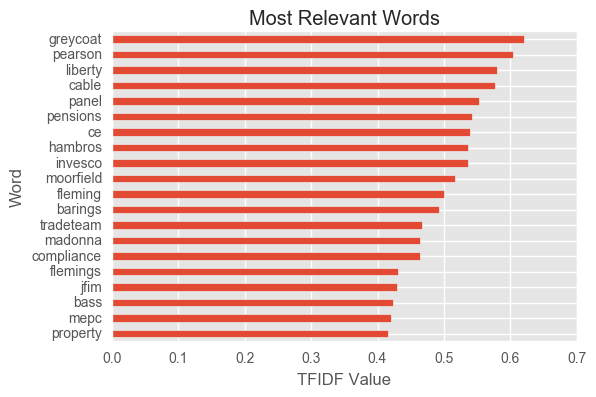

In [105]:
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

## Word Visualization by Author

In [86]:
by_author = dict()
for i in range(0, 2500, 50):
    by_author[authors[i]] = cleaned_articles[i:i+50]

### Aaron Pressman

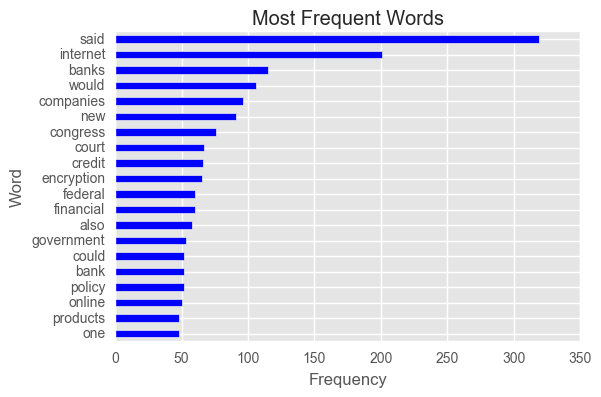

In [96]:
bag_words = count_vect.fit_transform(by_author['AaronPressman'])
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="Blue")
plt.xlabel("Frequency")
plt.ylabel("Word")

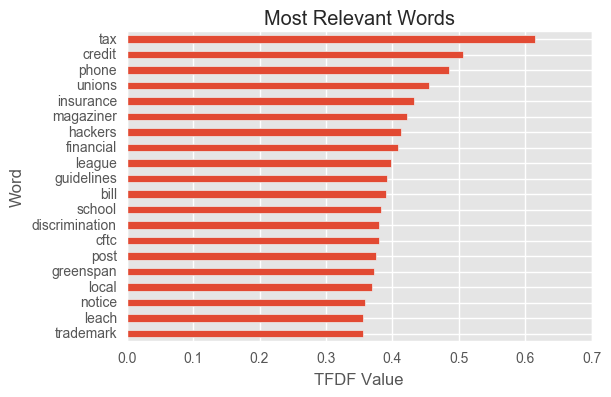

In [98]:
tfidf_mat = tfidf_vect.fit_transform(by_author['AaronPressman'])
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
most_rel = df.max().sort_values()[-20:]
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

### Alan Crosby

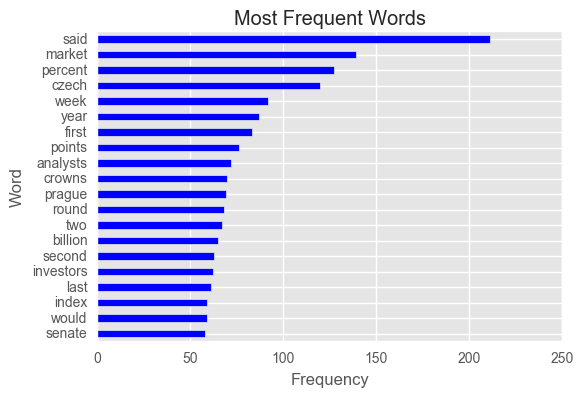

In [101]:
bag_words = count_vect.fit_transform(by_author['AlanCrosby'])
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="Blue")
plt.xlabel("Frequency")
plt.ylabel("Word")

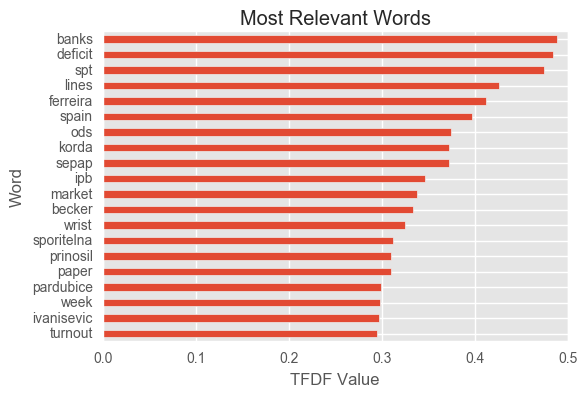

In [99]:
tfidf_mat = tfidf_vect.fit_transform(by_author['AlanCrosby'])
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
most_rel = df.max().sort_values()[-20:]
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

### Alexander Smith

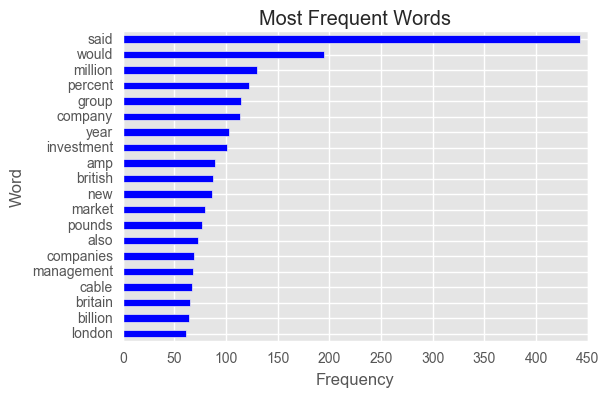

In [106]:
bag_words = count_vect.fit_transform(by_author['AlexanderSmith'])
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="Blue")
plt.xlabel("Frequency")
plt.ylabel("Word")

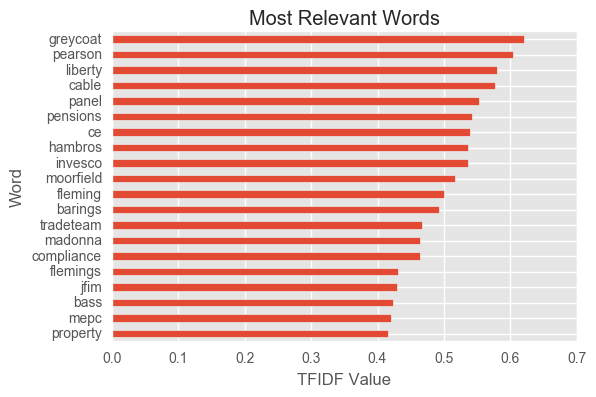

In [107]:
tfidf_mat = tfidf_vect.fit_transform(by_author['AlexanderSmith'])
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
most_rel = df.max().sort_values()[-20:]
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

### Benjamin Kang Lim

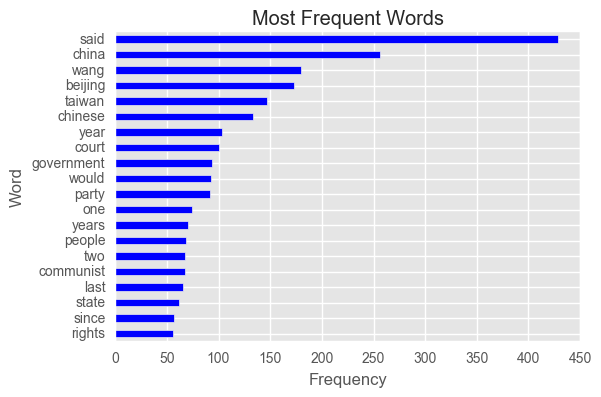

In [109]:
bag_words = count_vect.fit_transform(by_author['BenjaminKangLim'])
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="Blue")
plt.xlabel("Frequency")
plt.ylabel("Word")

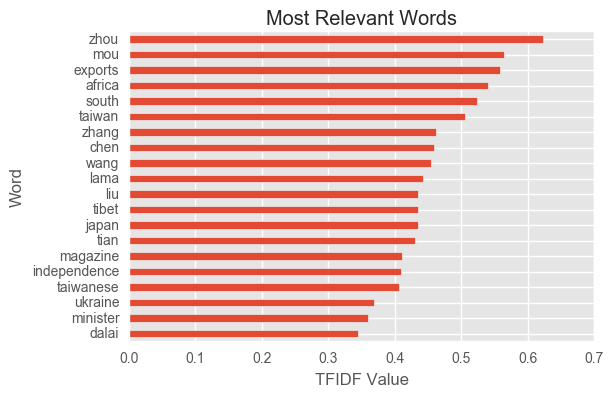

In [108]:
tfidf_mat = tfidf_vect.fit_transform(by_author['BenjaminKangLim'])
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
most_rel = df.max().sort_values()[-20:]
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

### Bernard Hickey

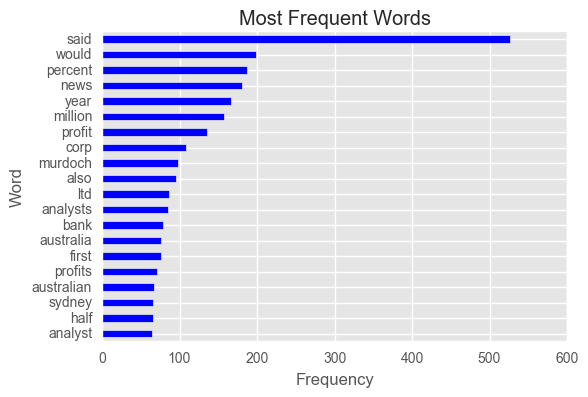

In [111]:
bag_words = count_vect.fit_transform(by_author['BernardHickey'])
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="Blue")
plt.xlabel("Frequency")
plt.ylabel("Word")

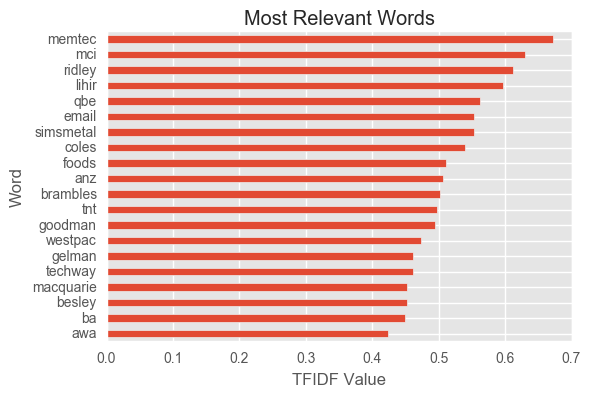

In [112]:
tfidf_mat = tfidf_vect.fit_transform(by_author['BernardHickey'])
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
most_rel = df.max().sort_values()[-20:]
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

### Brad Dorfman

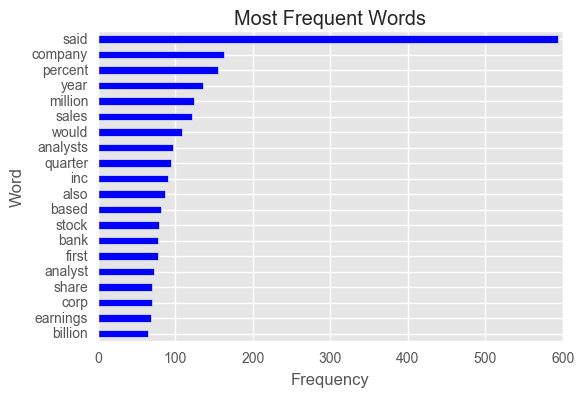

In [114]:
bag_words = count_vect.fit_transform(by_author['BradDorfman'])
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="Blue")
plt.xlabel("Frequency")
plt.ylabel("Word")

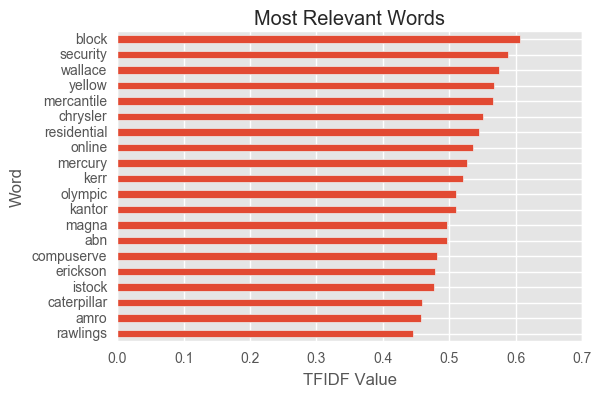

In [113]:
tfidf_mat = tfidf_vect.fit_transform(by_author['BradDorfman'])
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
most_rel = df.max().sort_values()[-20:]
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

### Darren Schuettler

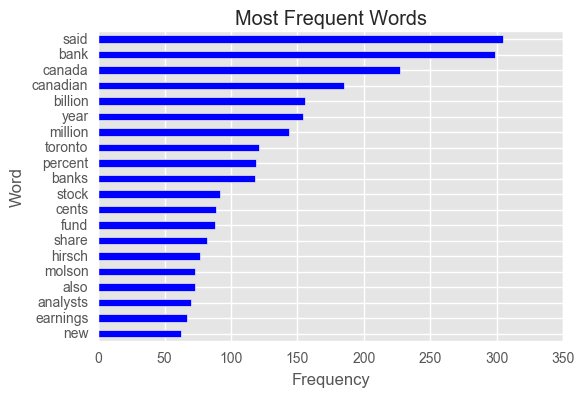

In [122]:
bag_words = count_vect.fit_transform(by_author['DarrenSchuettler'])
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="Blue")
plt.xlabel("Frequency")
plt.ylabel("Word")

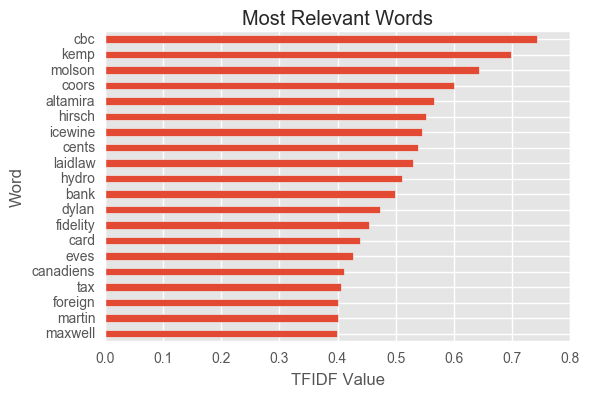

In [123]:
tfidf_mat = tfidf_vect.fit_transform(by_author['DarrenSchuettler'])
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
most_rel = df.max().sort_values()[-20:]
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

### David Lawder

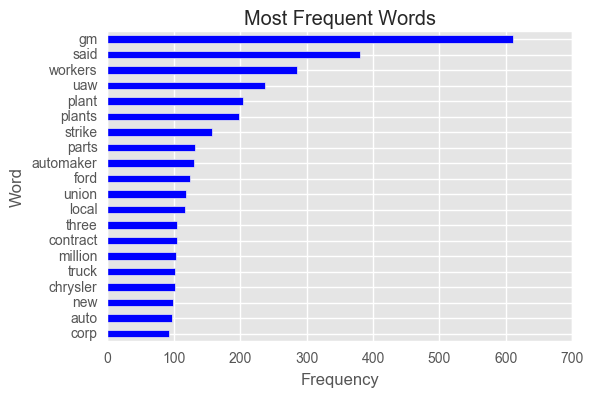

In [124]:
bag_words = count_vect.fit_transform(by_author['DavidLawder'])
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="Blue")
plt.xlabel("Frequency")
plt.ylabel("Word")

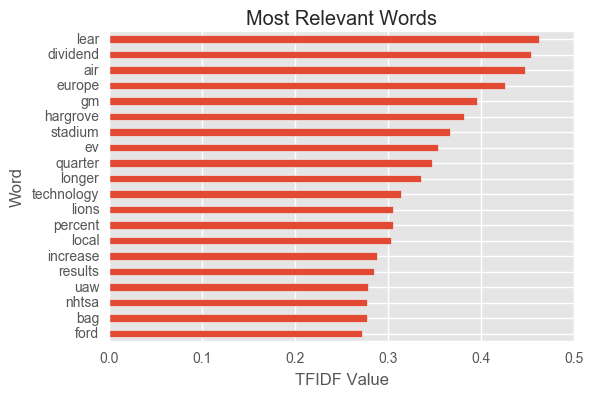

In [125]:
tfidf_mat = tfidf_vect.fit_transform(by_author['DavidLawder'])
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
most_rel = df.max().sort_values()[-20:]
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

### Edna Fernandes

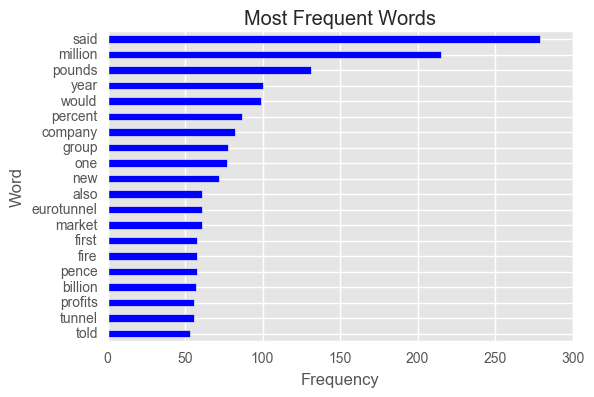

In [126]:
bag_words = count_vect.fit_transform(by_author['EdnaFernandes'])
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="Blue")
plt.xlabel("Frequency")
plt.ylabel("Word")

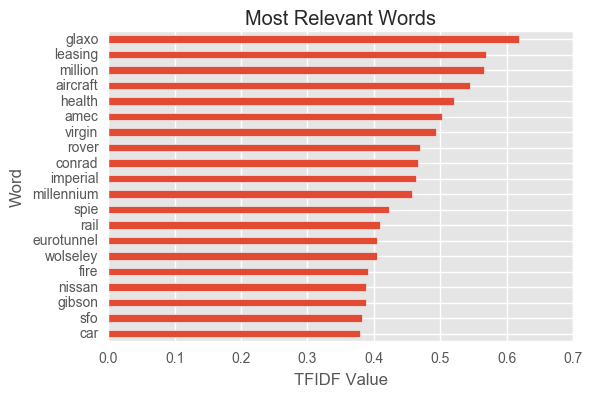

In [127]:
tfidf_mat = tfidf_vect.fit_transform(by_author['EdnaFernandes'])
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
most_rel = df.max().sort_values()[-20:]
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

### Eric Auchard

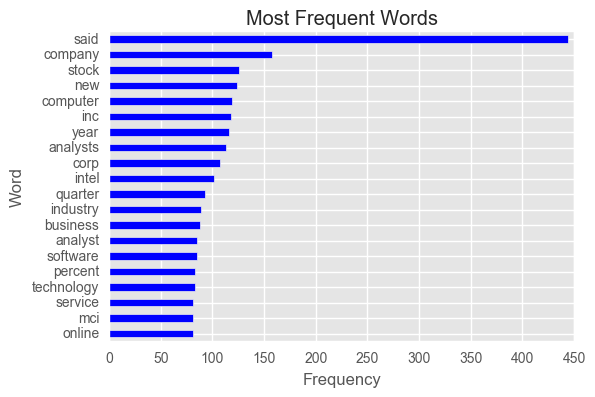

In [128]:
bag_words = count_vect.fit_transform(by_author['EricAuchard'])
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="Blue")
plt.xlabel("Frequency")
plt.ylabel("Word")

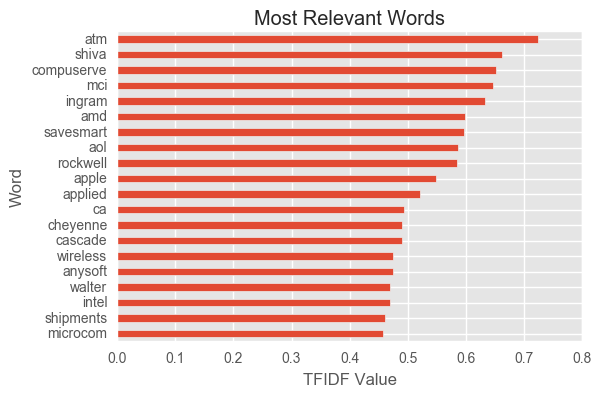

In [129]:
tfidf_mat = tfidf_vect.fit_transform(by_author['EricAuchard'])
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
most_rel = df.max().sort_values()[-20:]
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

In [91]:
# for author in by_author: 
#     tfidf_mat = tfidf_vect.fit_transform(by_author[author])
#     df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
#     print("Author: " + author)
#     print(df.max().sort_values()[-10:])